# Regression

##### * What is regression?

Regression analysis is a from of predictive modeling technique which investigates the relationship between a dependent and independent variable.

y = mx + c   # x is independent variable  and y is dependent on x

x = 5

m = 3 and c = 2

y = 3*5 + 2

### 1. Lenear Regression

##### What is lenear Regression?
Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). For more than one explanatory variable, the process is called multiple linear regression.

#### * Lenear Regression for Single Variables

First insert some module and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

Read the CSV file or create numpy array for data. For analysis the data we import pandas

In [2]:
df = pd.read_csv("house.csv")   # df means data frame (we also can use another object name as we wish, it depends on user)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
print(df)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


Now we plot the data for better understanding using matplotlib

Text(0.5, 1.0, 'Simple Linear Regerssion')

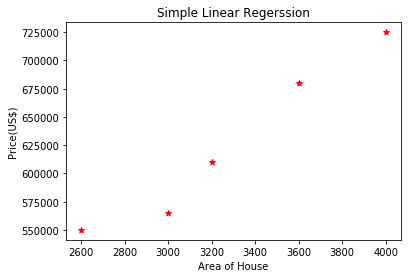

In [4]:
plt.scatter(df.area,df.price,color='red', marker='*')
plt.xlabel('Area of House')
plt.ylabel("Price(US$)")
plt.title("Simple Linear Regerssion")

Now our target is to find a best fitting line. First we do this manually by the mathematics of linear regression then by SK-Learn. 

In [5]:
x = df['area'].values
y = df['price'].values

In [6]:
# find the mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

Now train the data to machine using Linear Regression ALgorithm

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df[['price']])  # we give the column name of x and y 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

fit_intercept = True means the Model is trained succesfully and now it can predict. Lets do that

First you manually calculate the price of the house that's area is 3300. then predict using the model and you can get the answer that your machine can predict successfully

In [8]:
reg.predict([[3300]])   # manually  = 629062.5

array([[628715.75342466]])

The answer is near to the original answer. If the training is learge then the prediction is also nearer to the actual result. 

y = m*x + c is our equation, here m is the slove/ co-efficient and c is the intercept. Now we calculate both of the two.

### Pickle and Joblib the Object

In [9]:
import pickle

In [10]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

Now we can open model_pickle object in rb mode (read mode) and predict that

In [11]:
with open('model_pickle','rb') as f:    # open the pickle and use a object as(mp or or ....)
    mp = pickle.load(f)

In [12]:
mp.predict([[3000]])

array([[587979.45205479]])

In [13]:
with open('model_pickle','rb') as f:
    p = pickle.load(f)

In [14]:
p.predict([[15000]])

array([[2217431.50684932]])

In [15]:
from sklearn.externals import joblib

C:\Users\venzz\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [17]:
mj = joblib.load('model_joblib')

In [18]:
mj.predict([[3000]])

array([[587979.45205479]])

### Pickle and joblib is finished

#### Finding m and c

In [19]:
reg.coef_     # it print the co-efficient  value of m

array([[135.78767123]])

In [20]:
reg.intercept_   # it print the intercept  value of c

array([180616.43835616])

#### Now we calculate the price of 3300 area house manually using y = m*x + c equation 

In [21]:
m = 135.78767123
c = 180616.43835616
x = 3300

y = m*x + c

print(y)

628715.75341516


Now we get the same value of the prediction. By this way the model predict the answer.

In [22]:
d = pd.read_csv('house_test.csv')
d

,area
0,10000
1,20000
2,25000
3,27000
4,29000
5,32000
6,35000
7,37000
8,45000
9,50125


In [23]:
p = reg.predict(d)
p

array([[1538493.15068493],
       [2896369.8630137 ],
       [3575308.21917808],
       [3846883.56164384],
       [4118458.90410959],
       [4525821.91780822],
       [4933184.93150685],
       [5204760.2739726 ],
       [6291061.64383562],
       [6986973.45890411],
       [7328751.02739726],
       [9821541.09589041]])

In [24]:
d['price'] = p

In [25]:
d

,area,price
0,10000,1.538493e+06
1,20000,2.896370e+06
2,25000,3.575308e+06
3,27000,3.846884e+06
4,29000,4.118459e+06
5,32000,4.525822e+06
6,35000,4.933185e+06
7,37000,5.204760e+06
8,45000,6.291062e+06
9,50125,6.986973e+06


Now we gate the prediction answer of the house_test.cse file. Now we export the answer as an csv file

In [26]:
d.to_csv('house_predic_answer.csv',index=False)

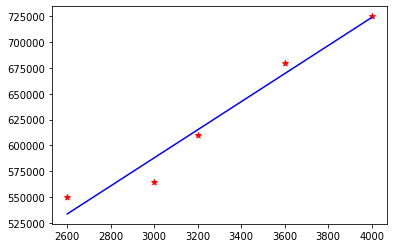

In [27]:
plt.scatter(df.area,df.price,color='red', marker='*')
#plt.xlabel('Area of House', fontsize = 20)
#plt.ylabel("Price(US$)", fontsize = 20)
#plt.title("Simple Linear Regerssion")
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

# Linear Regression for Multiple Variables

In [28]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [29]:
df = pd.read_csv("house_mul_train.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,32000,NaN,18,610000
3,36000,3.0,30,595000
4,4000,5.0,8,760000


First we handle the missing value of bedrooms using pandas.

In [30]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [31]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)     # fill all NaN value by using median value
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,32000,3.0,18,610000
3,36000,3.0,30,595000
4,4000,5.0,8,760000


In [32]:
reg = linear_model.LinearRegression()

reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
reg.coef_

array([ 3.03273612e+00,  8.47684957e+04, -3.11800467e+03])

In [34]:
reg.intercept_

320513.03571285907

In [35]:
reg.predict([[3000,3,15]])

array([537146.66125926])

We calculate the prediction using m1,m2,m3 and c manually

In [36]:
3.03273612e+00*3000+8.47684957e+04*3+-3.11800467e+03*15+320513.03571285907

537146.6611228591

In [37]:
reg.predict([[2500,4,5]])

array([651578.83559619])

Text(0.5, 1.0, 'Simple Linear Regerssion')

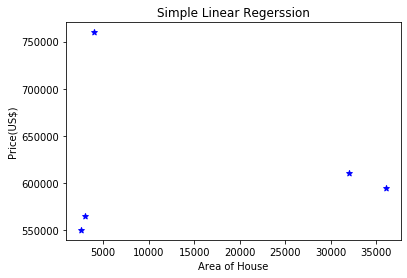

In [38]:
plt.scatter(df.area,df.price,color='blue', marker='*')
plt.xlabel('Area of House')
plt.ylabel("Price(US$)")
plt.title("Simple Linear Regerssion")